# Lecture 26 (5/25/2022)

**Announcements**
- Plan for upcoming lectures
    - Friday 5/27: last "official course content" lecture
    - Monday 5/30: no class (holiday)
    - Wednesday 6/1: **class in ERC 117** for final project presentations
        - Sign up for a slot [here](https://docs.google.com/spreadsheets/d/1Ppe4Ff3Tfj2rMSWaBVSo9bHT6mJRREtFF-mFr7AQ_0k/edit?usp=sharing)
    - Friday 6/3: special topic: APIs


*Last time we covered:*
- Dimensionality reduction: intro to Principal Components Analysis

**Today's agenda:**
- Interpreting PCA results (cont'd from last time) + Evaluating PCA 
    - These are kind of interchangeable so we'll mostly be presenting interpretation and evaluation measures together


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Interpreting Principal Components Analysis

## Review

On Monday, we walked through the basics of how PCA works and how to implement it with the sklearn `PCA` class. 

As a reminder, we're looking for lines like the blue and red ones below, which form the *principal components* of our data. 

![pca_static](img/pca_static.jpeg)

([Source](https://towardsdatascience.com/understanding-pca-fae3e243731d))

These lines have two key properties:

1. They represent the axes on which our data has the highest variance (the first principal component is the highest, the second is the second highest, ...)
2. They are *orthogonal* to each other, meaning they are *independent* as predictors of our data

Because of these properties, when we *project* our data onto the principal components, we can often describe most of the variance in our high-dimensional data with only a few principal component axes. In other words, they provide a high fidelity *summary* of what our data is doing without needing all the original dimensions. 

![pca](img/pca.gif)

([Source](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues))

For this reason, PCA is one of the most popular *dimension reduction* techniques in modern data science. 

Today, we're going to talk about how to interpret and evaluate our PCA resuls. 

## Example: low-dimensional representation of pokemon attributes

Today, we'll use the `pokemon` dataset, which we've discussed in previous lectures and assignments, to create a low-dimensional encoding of pokemon attributes.

In the data below, take a look at the columns indicating each pokemon's effectiveness (`HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`); we need a very high-dimensional representation of each pokemon if we use all these columns to cluster or classify them!

In [2]:
# Read in the data
pokemon = pd.read_csv("https://raw.githubusercontent.com/erik-brockbank/css2_sp22-public/main/Datasets/Pokemon.csv")
pokemon


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Let's find the principal components of these pokemon behavior attributes to create a lower-dimensional representation:

In [3]:
from sklearn.decomposition import PCA

# Use these columns as the basis for PCA
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Fit the PCA class to our data
pca = PCA().fit(pokemon.loc[:, cols])

How effective is PCA here?

- Look at the explained variance ratio to see how many principal components we need to account for a large amount of the variance in our data 

### Proportion of explained variance: how well do our principal components summarize the data?

A good first step after running PCA is to see how well each successive component accounts for variance in our original data. Remember, the principal components are identified in order of how much of the variance in the data they can explain. 

A *good* PCA result will show that you can account for a large percentage of the variance in the underlying data with much fewer dimensions.

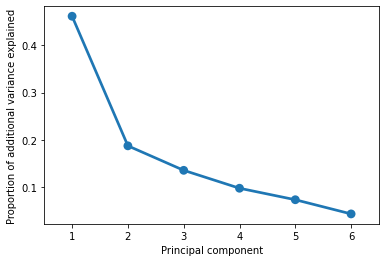

In [4]:
sns.pointplot(x = np.arange(1, pca.n_components_ + 1), y = pca.explained_variance_ratio_)
plt.xlabel("Principal component")
plt.ylabel("Proportion of additional variance explained")
plt.show()

The plot above suggests that we can explain 70-80% of variance in our (6-dimensional) data with just 2-3 dimensions. In other words, a lof the general pattern of our data is captured by a couple key axes. 

We can confirm this by adding up the actual values from the graph above:

In [5]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]

0.7843243951844534

So what are these axes? 

Remember that a "principal component" is just a line through our data, expressed via *weights* on each of the existing dimensions that are a lot like regression coefficients. Like regression coefficients, these weights tell us about the pattern in our original variables that each principal component is capturing.

### Principal component weights: what are the key "axes" along which our data varies?

Below, we'll plot the weights applied to each of our original dimensions to create the principal components. Ideally, these should give us some indication of the smaller number of "axes" that our data varies along. 

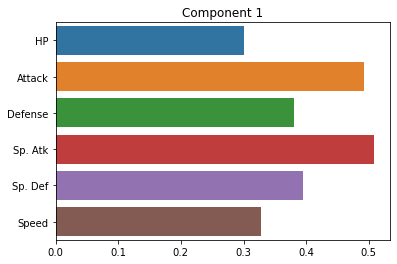

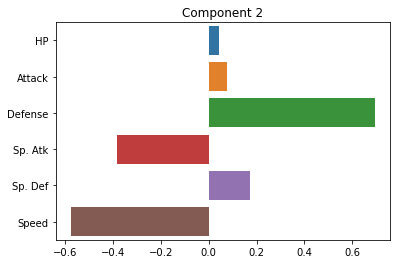

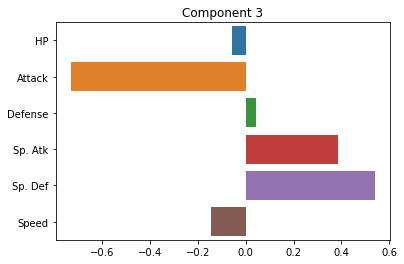

In [6]:
sns.barplot(x = pca.components_[0], y = cols)
plt.title("Component 1")
plt.show()

sns.barplot(x = pca.components_[1], y = cols)
plt.title("Component 2")
plt.show()

sns.barplot(x = pca.components_[2], y = cols)
plt.title("Component 3")
plt.show()

**How do we interpret these plots? What does each one mean?**

...


Note: PCA can sometimes present challenges in *interpreting* the principal components. In some cases, they may index really clear aspects of the data. In other cases, they may be more ambiguous. For this reason, it's best to have a grasp of the domain of the data when interpreting PCA. Like unsupervised clustering we talked about last week, it requires more subjective interpretation than our supervised methods.

***

### Transforming data onto principal components: how well do they summarize our data?

Since our principal components are *new orthogonal lines drawn through our data*, we can plot the value that each of our original data points takes on when *projected onto these lines*.

If the first 2-3 principal components describe our data well, we should see it line up in a fairly orderly way along these axes. 

Our first step is to *transform* our original data into a position on each of the principal components that our PCA identified:

In [7]:
pokemon_transform = pca.transform(X = pokemon.loc[:, cols])
pokemon_transform = pd.DataFrame(pokemon_transform, columns = ['Component ' + str(i) for i in np.arange(1, pca.n_components_ + 1)])

pokemon_transform

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302
...,...,...,...,...,...,...
795,72.196952,67.431919,44.284620,-34.857821,-10.971975,26.977909
796,120.944879,-20.303238,-8.390285,-38.395104,-44.341807,21.930314
797,75.999885,-27.270786,37.017466,19.106076,-28.247968,39.369910
798,114.096713,-36.870567,6.750875,17.902908,-45.622767,54.767251


The dataframe above shows us the values of each row of our original data *projected onto the principal components*.

In other words, instead of each Pokemon's values in $x_1$, $x_2$, ..., $x_n$, it shows us each pokemon's new value on $pc_1$, $pc_2$, ..., $pc_n$.

Let's add these to our original dataframe so we can do interesting comparisons:

In [8]:
pokemon = pd.concat([pokemon, pokemon_transform], axis = 1)
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,72.196952,67.431919,44.284620,-34.857821,-10.971975,26.977909
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,120.944879,-20.303238,-8.390285,-38.395104,-44.341807,21.930314
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,75.999885,-27.270786,37.017466,19.106076,-28.247968,39.369910
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,114.096713,-36.870567,6.750875,17.902908,-45.622767,54.767251


Now, let's get a sense of how well our first couple principal components summarize our data by plotting the data projected onto these components:

In other words, we plot each of our data points but instead of plotting them on our original axes, we plot them on the *new* principal component axes:

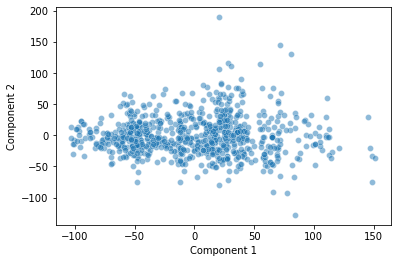

In [9]:
sns.scatterplot(data = pokemon, x = "Component 1", y = "Component 2", alpha = 0.5)
plt.show()

**How should we interpret this plot? What does it show?**

...

***

## Applying Principal Components: can we understand our data better by looking at the primary axes it varies along?

In the plot above, there seemed to be an intriguing discontinuity in our data along the first two principal components. 

One way to evaluate PCA is to see how well it affords the analyses we *want* to do with our high-dimensional data, like classification and clustering.

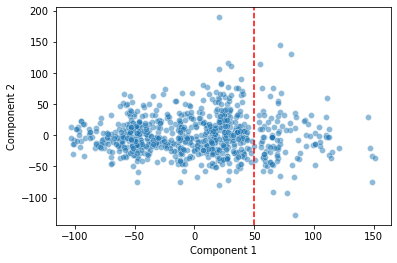

In [10]:
sns.scatterplot(data = pokemon, x = "Component 1", y = "Component 2", alpha = 0.5)
plt.axvline(x = 50, c = "r", ls = "--")
plt.show()

*Is the discontinuity in our first principal component telling us something useful about how our data is arranged in high-dimensional space?*

One way we can approach this question is by applying a clustering algorithm to our data, **but now we'll cluster along the principal components rather than the original data points**. 

This tells us how our low-dimensional data representation can be clustered.

*Does a Gaussian Mixture Model cluster according to the discontinuity we detected above?*

In [11]:
from sklearn.mixture import GaussianMixture

# Fit a GMM with 4 clusters
gm = GaussianMixture(n_components = 4, random_state = 1)

# Then, generate labels for each of our data points based on these clusters
preds = gm.fit_predict(X = pokemon.loc[:, ('Component 1', 'Component 2')])

# Finally, let's add these labels to our original dataframe
pokemon['pca_lab'] = preds

pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,pca_lab
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004,3
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865,3
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,72.196952,67.431919,44.284620,-34.857821,-10.971975,26.977909,2
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,120.944879,-20.303238,-8.390285,-38.395104,-44.341807,21.930314,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,75.999885,-27.270786,37.017466,19.106076,-28.247968,39.369910,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,114.096713,-36.870567,6.750875,17.902908,-45.622767,54.767251,0


Now, let's see how well the clustering above did with our data arranged along the first two principal components:

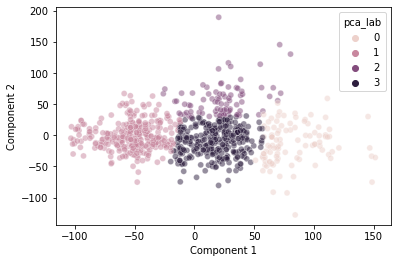

In [12]:
sns.scatterplot(data = pokemon, 
                x = "Component 1", 
                y = "Component 2", 
                hue = "pca_lab",
                alpha = 0.5)
plt.show()

This seems to do a decently good job clustering our data.

Interestingly, it does somewhat capture the discontinuity we observed at $pc_1 = 50$, though not perfectly.

As an aside, we can show that 4 clusters is a pretty good choice using the "elbow method" with the GMM's "Akaike Information Criterion" below:

<AxesSubplot:>

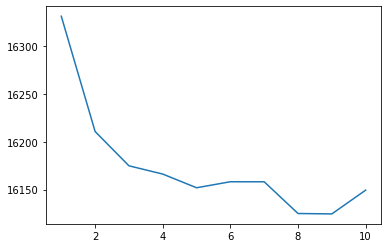

In [13]:
clusters = np.arange(1, 11)
scores = []

for k in clusters:
    scores.append(GaussianMixture(n_components = k, random_state = 1).fit(
            X = pokemon.loc[:, ('Component 1', 'Component 2')]).aic(
            X = pokemon.loc[:, ('Component 1', 'Component 2')]))
scores
    
sns.lineplot(x = clusters, y = scores)

*So what's happening at that discontinuity in our first principal component?*

*Is there anything interpretable in our data that the PCA identified?*

Note, there's nothing guaranteeing that this will be the case, but here, it looks like this discontinuity may in part reflect whether a pokemon is "Legendary" or not!

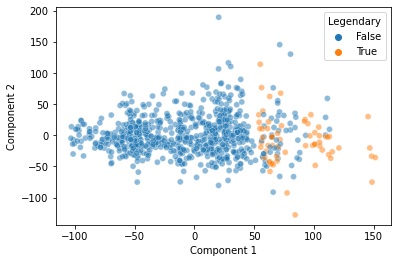

In [14]:
sns.scatterplot(data = pokemon, 
                x = "Component 1", 
                y = "Component 2", 
                hue = "Legendary",
                alpha = 0.5)
plt.show()

That's pretty cool! Our Principal Components Analysis showed us a pattern in our data along the primary axes that our data varies on. 

And, when we cluster based on those primary axes, we do a decent job separating out the "Legendary" pokemon based on this discontinuity:

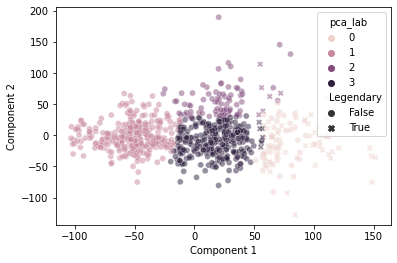

In [15]:
sns.scatterplot(data = pokemon, 
                x = "Component 1", 
                y = "Component 2", 
                hue = "pca_lab",
                style = "Legendary",
                alpha = 0.5)
plt.show()

It's not perfect, but pretty good!

Now, if you're skeptical of the above, you might be thinking, "maybe we could have done all this *without* our fancy PCA and clustering based on principal components." 

When we look at our data with "Legendary" pokemon highlighted in each of the two-dimensional representations of our original data, it seems kind of unlikely that a clustering solution would easily isolate those labels...

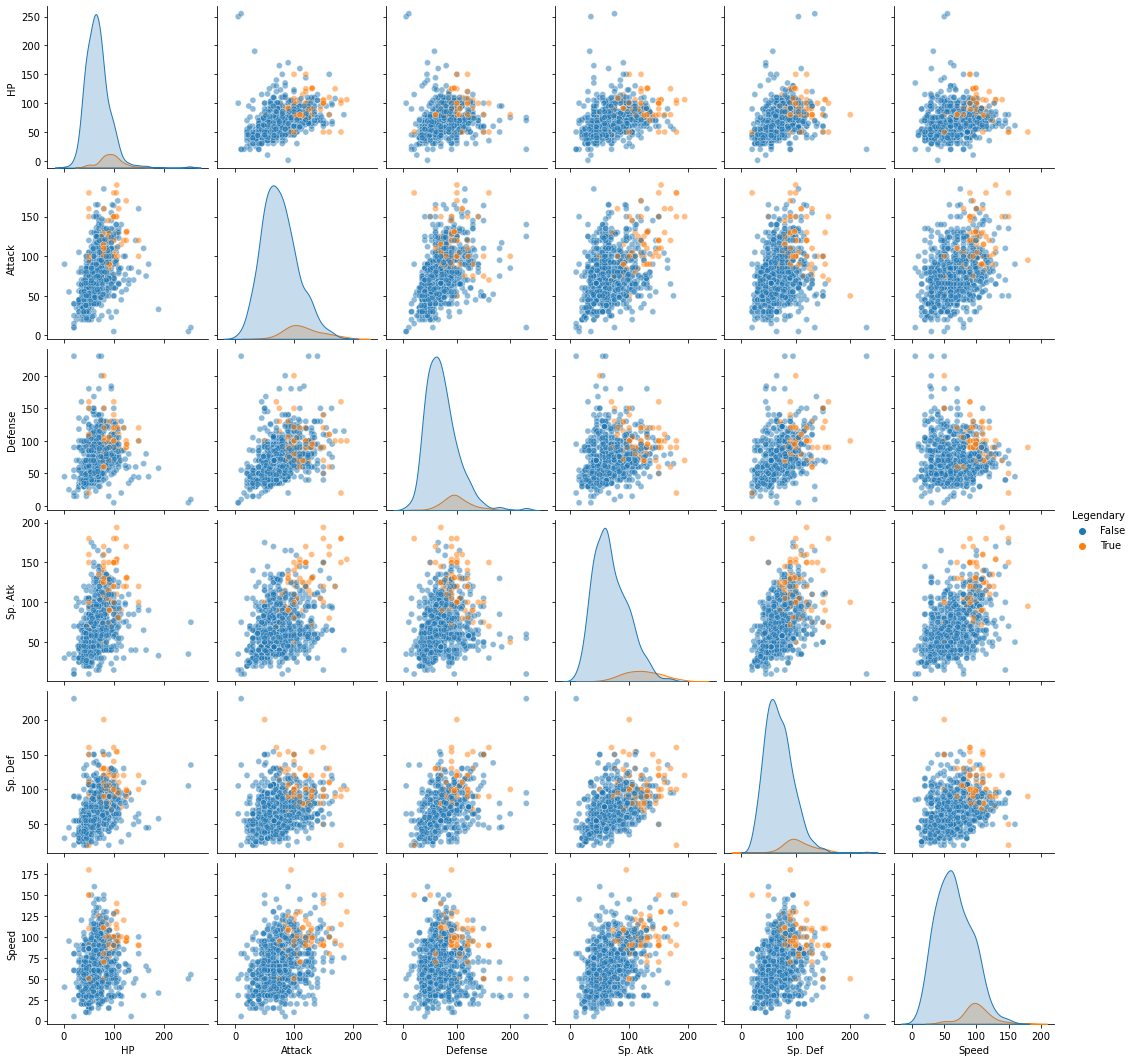

In [16]:
cols.append('Legendary')
sns.pairplot(pokemon.loc[:, cols],
             hue = "Legendary",
             plot_kws = {"alpha": 0.5}
            )

But, just for thoroughness, we can run a similar GMM with 4 clusters on the *original high-dimensional data* and see if we do as clean a job separating out the "Legendary" pokemon:

In [17]:
# Use these columns as the basis for our high-dimensional GMM
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Then, fit a GMM and assign the labels to our original data 
# we call them 'highd_lab' to differentiate from the PCA labels ('pca_lab')
pokemon['highd_lab'] = GaussianMixture(n_components = 4, random_state = 1).fit_predict(X = pokemon.loc[:, cols])
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Generation,Legendary,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,pca_lab,highd_lab
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,1,False,-45.860728,-5.384432,18.925550,-0.988558,-12.398527,10.548700,1,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,1,False,-11.152937,-5.805620,20.848717,0.269407,-5.800877,7.175004,3,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,1,False,36.946009,-5.236130,21.520463,1.531646,2.445413,3.159865,3,2
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,1,False,80.128413,18.995343,29.313909,-11.228419,-8.684840,0.214346,0,3
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,1,False,-50.385905,-21.792797,3.921880,-12.581893,-7.357519,3.041302,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,6,True,72.196952,67.431919,44.284620,-34.857821,-10.971975,26.977909,2,3
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,6,True,120.944879,-20.303238,-8.390285,-38.395104,-44.341807,21.930314,0,3
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,6,True,75.999885,-27.270786,37.017466,19.106076,-28.247968,39.369910,0,3
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,6,True,114.096713,-36.870567,6.750875,17.902908,-45.622767,54.767251,0,3


How did we do here? Did these clusters also identify our "Legendary" pokemon?

One drawback of doing the high-dimensional clustering is that it's not easy to visualize our data in this many dimensions!

Instead, we can resort to a summary based on counting the percent of "Legendary" pokemon assigned to each of our high dimensional clusters:

In [18]:
highd_summary = pokemon.groupby("highd_lab").agg(
    Legendary = ("Legendary", "sum"),
).reset_index()

highd_summary['Legendary_pct'] = highd_summary['Legendary'] / np.sum(highd_summary['Legendary'])
highd_summary

,highd_lab,Legendary,Legendary_pct
0,0,4,0.061538
1,1,0,0.000000
2,2,33,0.507692
3,3,28,0.430769


We did... not great. We have about 23% of our "Legendary" pokemon in one cluster, 58% in another, and 19% in a third. 

How does this compare to our PCA-based clusters above, using only the first two principal components?

In [19]:
lowd_summary = pokemon.groupby("pca_lab").agg(
    Legendary = ("Legendary", "sum"),
).reset_index()

lowd_summary['Legendary_pct'] = lowd_summary['Legendary'] / np.sum(lowd_summary['Legendary'])
lowd_summary

,pca_lab,Legendary,Legendary_pct
0,0,53,0.815385
1,1,0,0.000000
2,2,6,0.092308
3,3,6,0.092308


With PCA and only *two* dimensions, we put 83% of our "Legendary" pokemon into a single cluster and less than 10% in the others. This is much better!

***What's the point of all this?***

When we take our high-dimensional data and use a dimensionality reduction technique like PCA to identify the primary axes that our data varies on, this can actually help us understand our data **better** than in its original form. 

Here, for example, we saw that the primary axis along which our data varies does a pretty good job of separating out "Legendary" pokemon from the others. Clustering algorithms based on just the first two principal components do a better job isolating these pokemon than the same algorithms applied to our original data!



***

### Evaluating PCA along individual dimensions



In [20]:
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

pokemon_subset = pokemon.loc[:, cols]

# Fit the PCA class to our data with just two principal components
pca2 = PCA(n_components = 2).fit(pokemon_subset)

# Transform our data onto these two principal components
pca2_vals = pd.DataFrame(pca2.transform(pokemon.loc[:, cols]), columns = ["PC1", "PC2"])
pca2_vals

# Add the transformed data to our dataframe
pokemon_subset = pd.concat([pokemon_subset, pca2_vals], axis = 1)
pokemon_subset

# Run the "inverse transform" of our data projected onto the principal components
inv_transform = pca2.inverse_transform(pca2.transform(pokemon.loc[:, cols]))
inv_transform

# Make a dataframe of the new predictions and add it to our original dataframe for comparison
pca2_preds = pd.DataFrame(inv_transform, columns = [elem + "_pred" for elem in cols])
pca2_preds

pokemon_subset = pd.concat([pokemon_subset, pca2_preds], axis = 1)
pokemon_subset

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,PC1,PC2,HP_pred,Attack_pred,Defense_pred,Sp. Atk_pred,Sp. Def_pred,Speed_pred
0,45,49,49,65,65,45,-45.860728,-5.384432,55.236205,55.984724,52.642982,51.541692,52.880090,56.370858
1,60,62,63,80,80,60,-11.152937,-5.805620,65.658802,73.059669,65.561149,69.368731,66.494554,67.972058
2,80,82,83,100,100,80,36.946009,-5.236130,80.151381,96.810835,84.265187,93.631871,85.562359,83.384973
3,80,100,123,122,120,80,80.128413,18.995343,94.163805,119.949881,117.548003,106.322678,106.805912,83.557711
4,39,52,43,60,50,65,-50.385905,-21.792797,53.182394,52.498326,39.513188,55.527978,48.242175,64.342455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,72.196952,67.431919,93.822481,119.748098,148.202887,83.719427,112.100828,53.058732
796,50,160,110,160,110,110,120.944879,-20.303238,104.782914,137.059880,105.763167,142.161063,116.068896,119.554513
797,80,110,60,150,130,70,75.999885,-27.270786,90.969004,114.373532,83.811600,121.955673,97.132328,108.859557
798,80,160,60,170,130,80,114.096713,-36.870567,102.023620,132.416331,91.638649,145.025926,110.487221,126.857459


In [21]:
# What is the difference between our original values and our "predicted" values?
pokemon_subset[cols] - pca2.inverse_transform(pca2.transform(pokemon_subset[cols]))

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-10.236205,-6.984724,-3.642982,13.458308,12.119910,-11.370858
1,-5.658802,-11.059669,-2.561149,10.631269,13.505446,-7.972058
2,-0.151381,-14.810835,-1.265187,6.368129,14.437641,-3.384973
3,-14.163805,-19.949881,5.451997,15.677322,13.194088,-3.557711
4,-14.182394,-0.498326,3.486812,4.472022,1.757825,0.657545
...,...,...,...,...,...,...
795,-43.822481,-19.748098,1.797113,16.280573,37.899172,-3.058732
796,-54.782914,22.940120,4.236833,17.838937,-6.068896,-9.554513
797,-10.969004,-4.373532,-23.811600,28.044327,32.867672,-38.859557
798,-22.023620,27.583669,-31.638649,24.974074,19.512779,-46.857459


In [22]:
# What is the mean of these differences squared in each column?
((pokemon_subset[cols] - pca2.inverse_transform(pca2.transform(pokemon_subset[cols])))**2).mean()

HP         425.808290
Attack     445.921493
Defense    127.285682
Sp. Atk    281.520945
Sp. Def    358.746080
Speed      245.169533
dtype: float64

**What does this tell us?**

The mean squared error for each of our columns when we project them onto the principal components gives us an indication of how much information we lose when we project our original data in high dimensions onto (in this case) just two principal components.

Now, we can calculate something kind of like $R^2$ to see how much of the variance in each column's individual values is accounted for by the principal component predictions.

In [23]:
# This is the mean total sum of squares for each column (essentially the variance)
((pokemon_subset[cols] - pokemon_subset[cols].mean())**2).mean()

HP          651.204298
Attack     1052.163748
Defense     971.195194
Sp. Atk    1069.410100
Sp. Def     773.480494
Speed       843.455494
dtype: float64

In [24]:
# When we divide the mean sum of squared "residuals" by the mean total sum of squares (and subtract from 1),
# this gives us an R^2 metric for our PCA broken out by each column
1 - (((pokemon_subset[cols] - pca2.inverse_transform(pca2.transform(pokemon_subset[cols])))**2).mean() / ((pokemon_subset[cols] - pokemon_subset[cols].mean())**2).mean())

HP         0.346122
Attack     0.576186
Defense    0.868939
Sp. Atk    0.736751
Sp. Def    0.536192
Speed      0.709327
dtype: float64